# Non-parametric Statistics 
## Chapter 3.3: Splines
### Use of Different Degrees

In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

%matplotlib inline

In [4]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap3/splines")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/adam/Desktop/Edinburgh/y4/MP/nonparam-stats-proj/plots/chap3/splines'

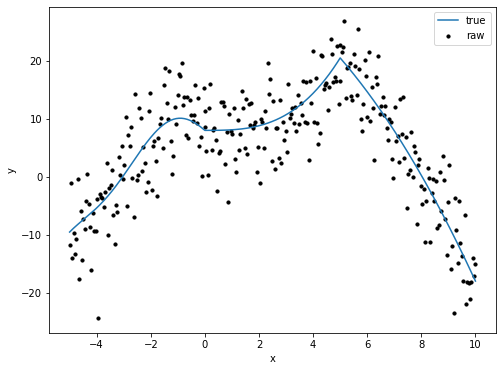

In [112]:
# generate data
x = np.linspace(-5, 0, 100)
data = x + 3/2*x**2 + 1/3*x**3 + 5*np.cos(x) - 5*np.sin(x) + 3 + np.random.normal(0, 5, size = 100)
true = x + 3/2*x**2 + 1/3*x**3 + 5*np.cos(x) - 5*np.sin(x) + 3

x2 = np.linspace(0, 5, 100)
data2 = 1/10*x2**3 + 8 + np.random.normal(0, 5, size = 100)
true2 = 1/10*x2**3 + 8

x3 = np.linspace(5, 10, 100)
data3 = -1/2*x3**2 + 10/x3 + 31 + np.random.normal(0, 5, size = 100)
true3 = -1/2*x3**2 + 10/x3 + 31

x = np.concatenate((x, x2, x3), axis=0)
true = np.concatenate((true, true2, true3), axis=0)
data = np.concatenate((data, data2, data3), axis=0)

plt.figure(figsize=(8, 6))
plt.plot(x, true, label="true")
plt.scatter(x, data, label="raw", c="black", s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.show()

In [121]:
transformed_x = dmatrix("bs(x, knots=(0,5), degree=3, include_intercept=False)",
                        {"x": x}, return_type='dataframe')
transformed_x2 = dmatrix("bs(x, knots=(0,5), degree=1, include_intercept=False)",
                        {"x": x}, return_type='dataframe')
transformed_x
transformed_x2

,Intercept,"bs(x, knots=(0, 5), degree=1, include_intercept=False)[0]","bs(x, knots=(0, 5), degree=1, include_intercept=False)[1]","bs(x, knots=(0, 5), degree=1, include_intercept=False)[2]"
0,1.0,0.000000,0.000000,0.000000
1,1.0,0.010101,0.000000,0.000000
2,1.0,0.020202,0.000000,0.000000
3,1.0,0.030303,0.000000,0.000000
4,1.0,0.040404,0.000000,0.000000
...,...,...,...,...
295,1.0,0.000000,0.040404,0.959596
296,1.0,0.000000,0.030303,0.969697
297,1.0,0.000000,0.020202,0.979798
298,1.0,0.000000,0.010101,0.989899


In [122]:
fit = sm.GLM(data, transformed_x).fit()
fit2 = sm.GLM(data, transformed_x2).fit()

In [123]:
fit.params
fit2.params

Intercept                                                    -7.317875
bs(x, knots=(0, 5), degree=1, include_intercept=False)[0]    16.007063
bs(x, knots=(0, 5), degree=1, include_intercept=False)[1]    24.695802
bs(x, knots=(0, 5), degree=1, include_intercept=False)[2]    -6.633880
dtype: float64

In [125]:
pred = fit.predict(transformed_x)
pred2= fit2.predict(transformed_x2)
pred
pred2

0      -7.317875
1      -7.156187
2      -6.994500
3      -6.832812
4      -6.671125
         ...    
295   -12.685909
296   -13.002370
297   -13.318832
298   -13.635293
299   -13.951755
Length: 300, dtype: float64

<Figure size 432x288 with 0 Axes>

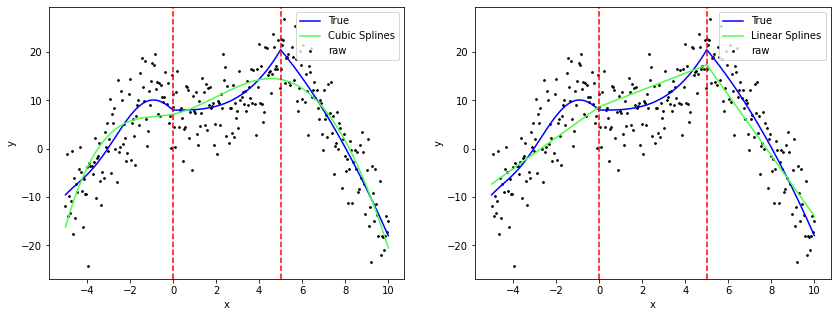

In [157]:
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(x, true, label="True", c='blue')
axs[0].scatter(x, data, label="raw", c='black', s=3)
axs[0].plot(x, pred, label="Cubic Splines", c='#47ff47')
axs[0].axvline(x=0, color='r', linestyle='--')
axs[0].axvline(x=5, color='r', linestyle='--')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend(loc="upper right")


axs[1].plot(x, true, label="True", c='blue')
axs[1].scatter(x, data, label="raw", c="black", s=3)
axs[1].plot(x, pred2, label="Linear Splines", c='#47ff47')
axs[1].axvline(x=0, color='r', linestyle='--')
axs[1].axvline(x=5, color='r', linestyle='--')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].legend(loc="upper right")
plt.savefig(os.path.join(plots_folder, f"example-splines.png"))

plt.show()